# We have already discussed how to create it, It's just a map with values attributed on the map, like when we plotted the trees per area and used the color attribute
#### The main idea was: plot the spatial coordinates, color each area with it's respictive value of the variable provided in the column keyword The thing is, the human eyes can hardly seperate small differences in colors, so  , we need to be efficient with that.
#### locations.plot(column = 'variable' , scheme = 'quantiles' , k =7 , cmap = 'viridis')
##### 'k' : Number of classes. The higher the 'k' the greater the details explained, but the harder it is to interpret the colors as well
##### 'scheme' : classification algorithm. It's how we allocate every value in out 'variable' to a 'k'
##### 'cmap' : Color palette
# The Equal Interval classification method
#### This splits the values range into equal segments and assigns a different color to each bin
#### If you created a distplot you can check for the distribution of the values, if it's not evenly distributed like the case here, we'll end up with a large amount of the values allocated to a single color, the (-10000 , 0) range for example

![EqualInterval.jpg](attachment:Equal%20Interval.jpg)

# The quantiles
#### it ranks all the values and allocate the same proportion to each color bin, each will take 1/7 of the observations this balances the coloring issue a little bit, but, it creates another issue, where it allocates different values into the same color bin! from (20000 to 30000) and other instances!

![Quantiles.png](attachment:Quantiles.png)

# The Color Maps
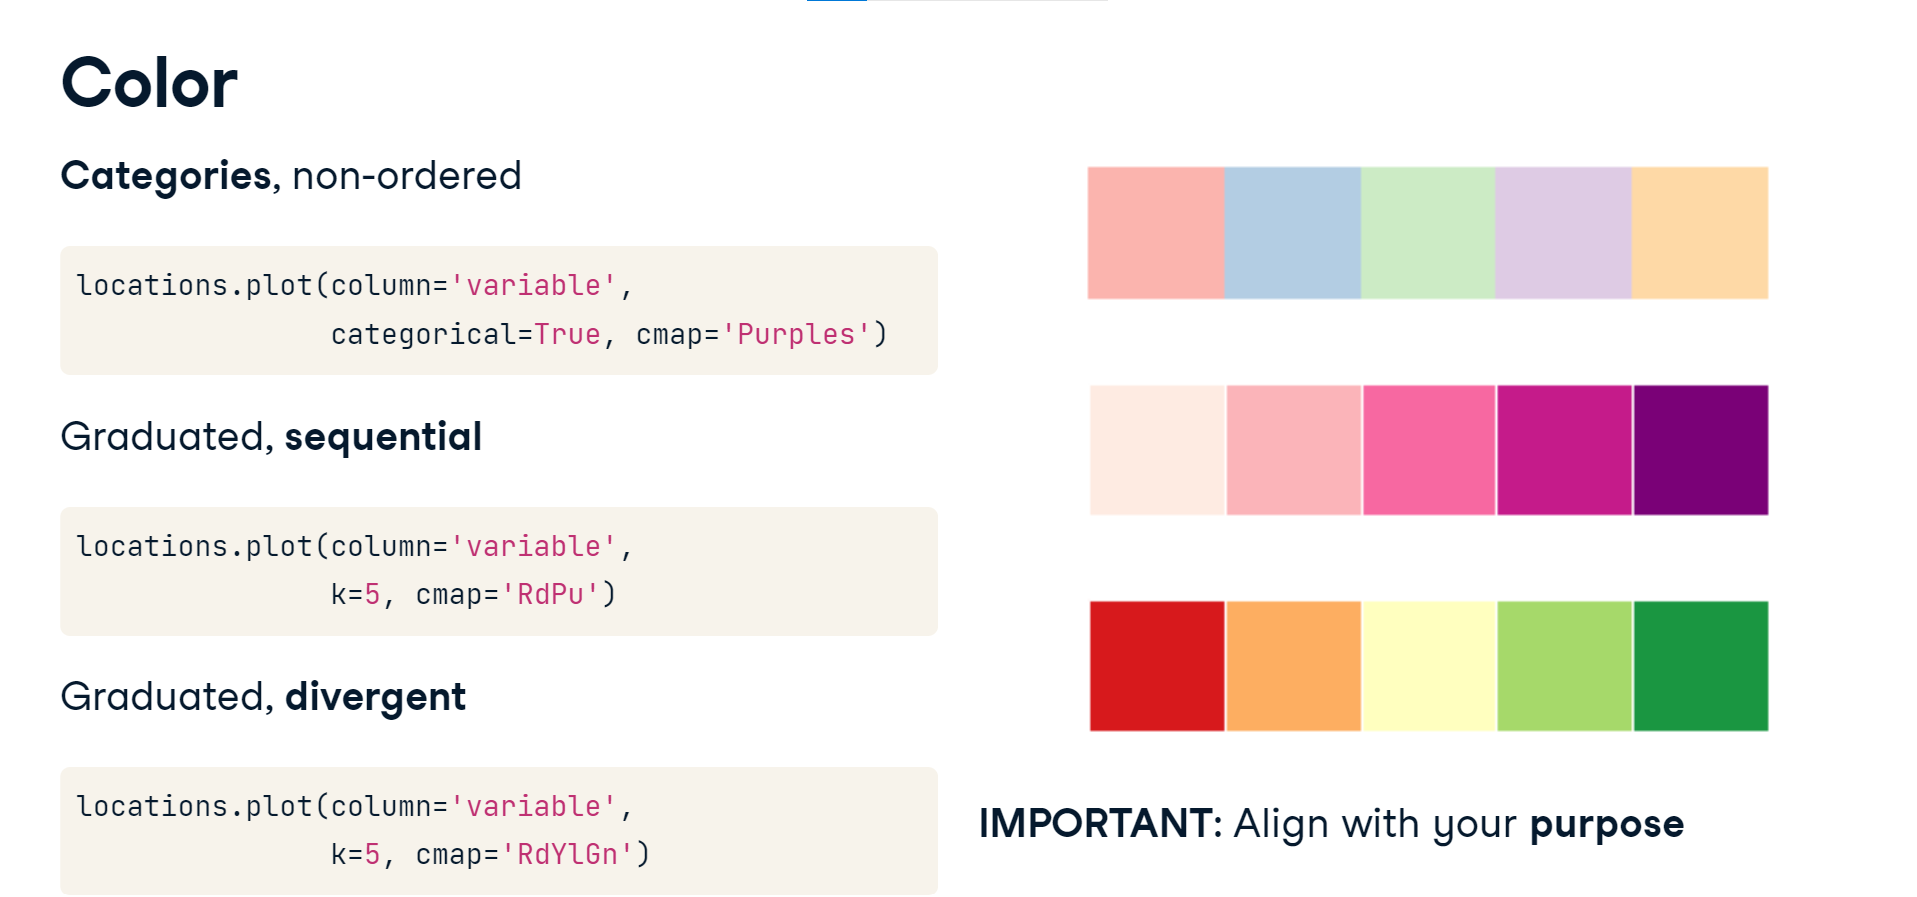

In [14]:
import geopandas as gpd
import pandas as pd
districts =gpd.read_file('paris_districts_utm.geojson')
trees = gpd.read_file('paris_trees_small.gpkg')
joined = gpd.sjoin(trees , districts , predicate = 'within')
joined.head()

,species,location_type,geometry,index_right,id,district_name,population
0,Marronnier,Alignement,POINT (455834.122 5410780.606),43,44,Sainte-Marguerite,36476
130,Micocoulier,Alignement,POINT (455458.848 5411310.443),43,44,Sainte-Marguerite,36476
142,Platane,Alignement,POINT (455704.681 5410991.067),43,44,Sainte-Marguerite,36476
402,Cedrele,Alignement,POINT (455538.223 5411112.314),43,44,Sainte-Marguerite,36476
428,Micocoulier,Alignement,POINT (455487.563 5411285.863),43,44,Sainte-Marguerite,36476


### Get the number of trees per district

In [25]:
trees_by_district = joined.groupby('district_name')['id'].count().to_frame(name = 'n_trees')
trees_by_district

,n_trees
district_name,
Amérique,183
Archives,8
Arsenal,60
Arts-et-Metiers,20
Auteuil,392
...,...
St-Germain-l'Auxerrois,40
Ternes,131
Val-de-Grace,25


### Join the n_trees back to districts dataframe

In [26]:
districts_trees = pd.merge(districts , trees_by_district, on = 'district_name')
districts_trees

,id,district_name,population,geometry,n_trees
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",40
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",40
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",4
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",7
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7
...,...,...,...,...,...
75,76,Combat,38988,"POLYGON ((455155.128 5414359.413, 455239.337 5...",181
76,77,Belleville,35773,"POLYGON ((454767.853 5412865.188, 454761.185 5...",65
77,78,Saint-Fargeau,42087,"POLYGON ((457014.145 5413260.154, 457015.161 5...",148
78,79,Père-Lachaise,42332,"POLYGON ((455648.392 5411702.054, 455580.676 5...",129


In [32]:
districts_trees['n_trees_per_area'] = districts_trees.n_trees / districts_trees.geometry.area*10000
districts_trees.head()

,id,district_name,population,geometry,n_trees,n_trees_per_area
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",40,0.460544
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",40,0.970315
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",4,0.146226
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",7,0.259922
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7,0.372519


### Let's see the distribution of the values (n_trees_per_area)

C:\Users\ismail.awad_maxab\AppData\Local\Temp\ipykernel_16900\704248343.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(districts_trees['n_trees_per_area'], ax = ax)


Text(0.5, 1.0, 'Distribution of trees per area')

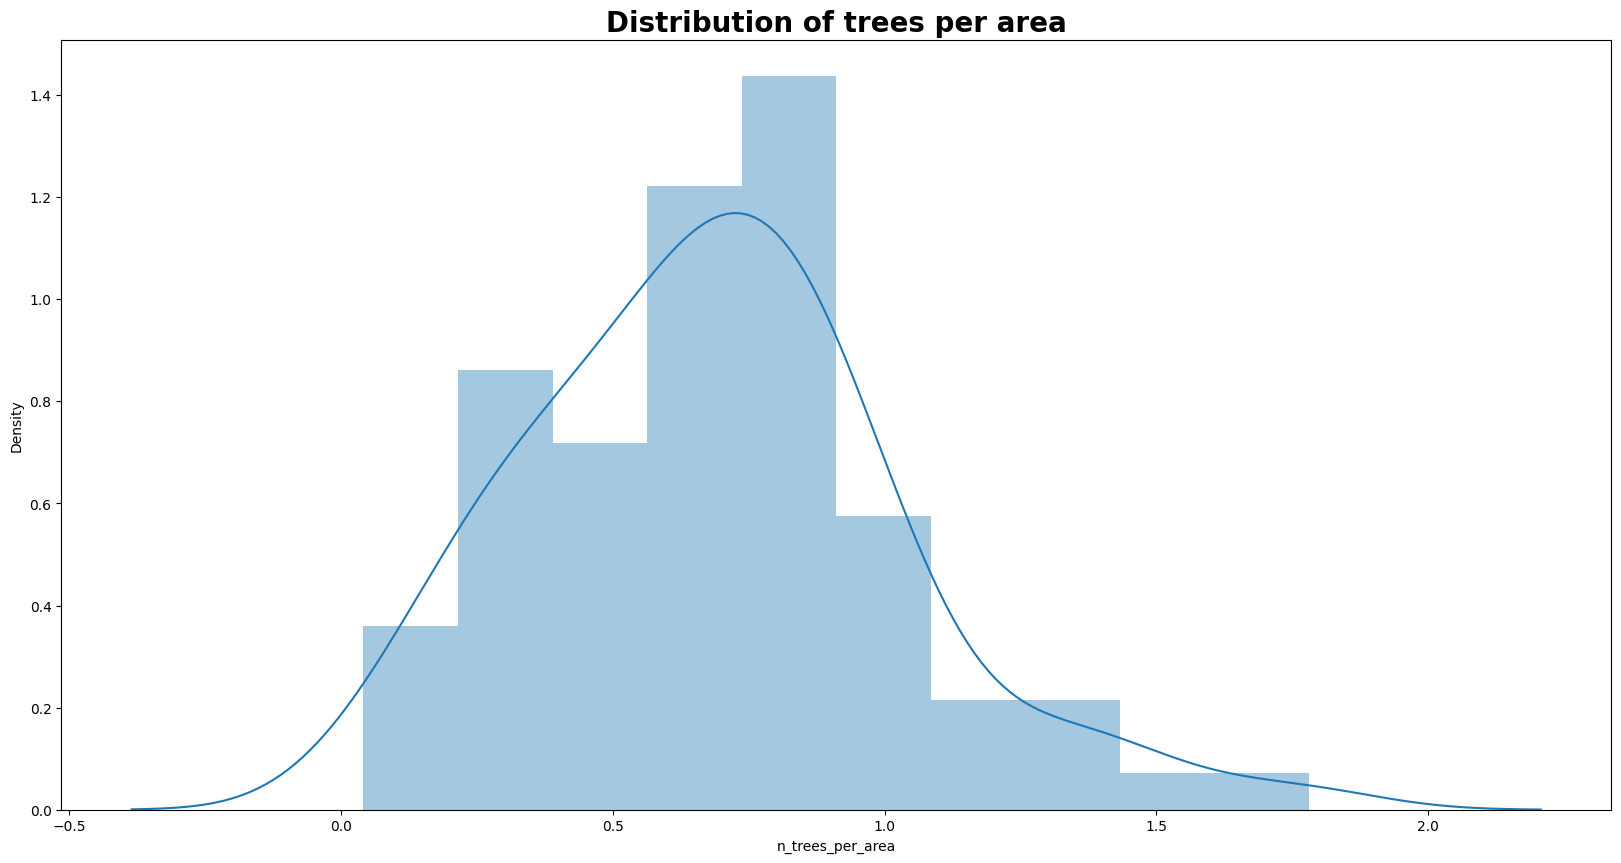

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
sns.distplot(districts_trees['n_trees_per_area'], ax = ax)
plt.title("Distribution of trees per area",fontsize = 20 , fontweight = 'bold')

### Because our data was some how evenly distributed, we will use the scheme = 'equal_intervals'

<AxesSubplot: >

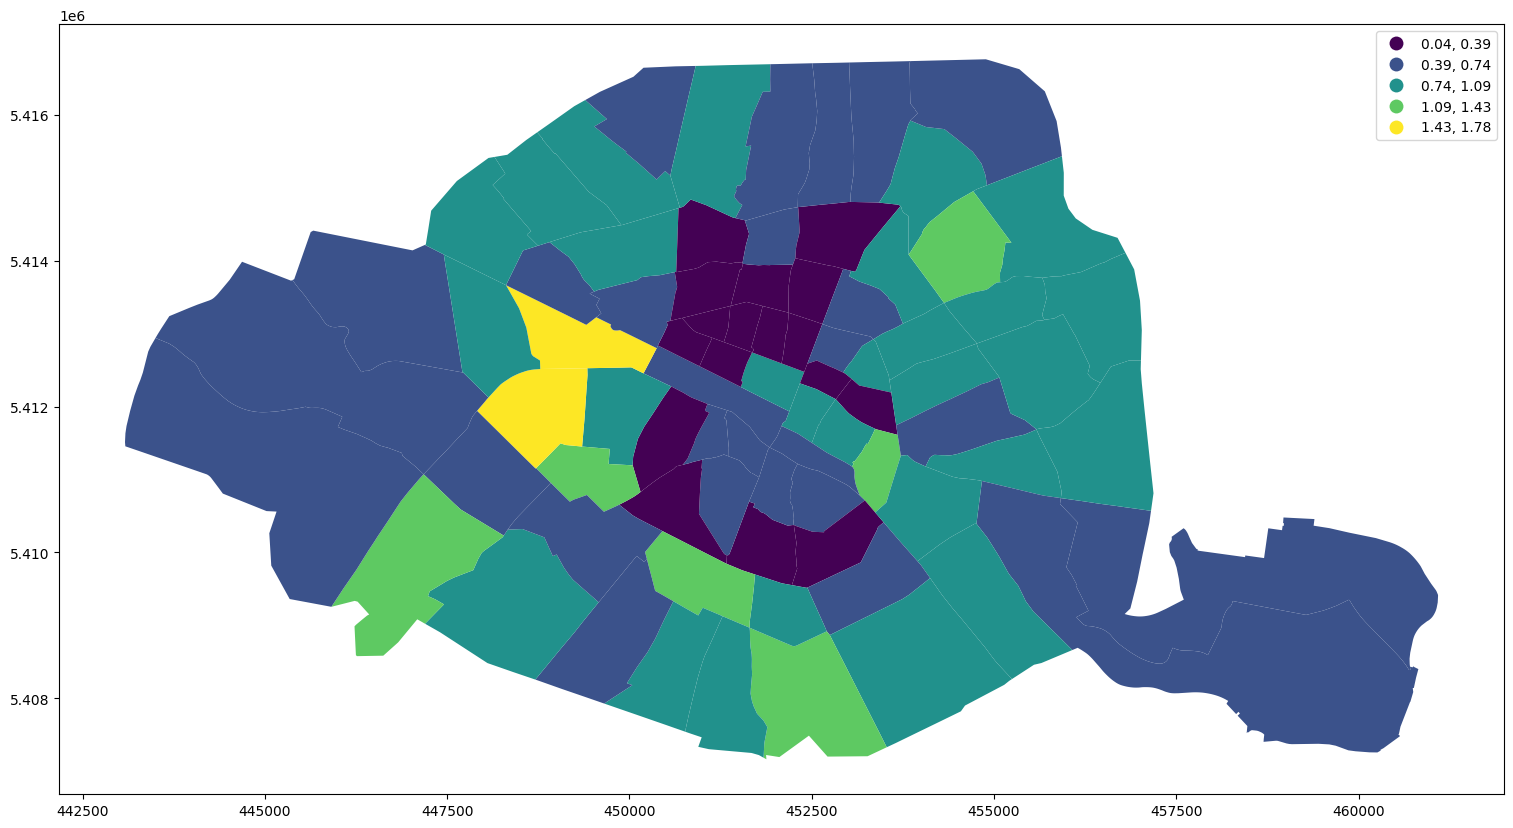

In [34]:
districts_trees.plot(column = 'n_trees_per_area' , scheme = 'equal_interval', figsize = (20,10) , legend= True)

### Nice! Do you notice how the colors can defrentiate places from one another? When making choropleths, it is important to always use a variable that is normalized for the area being plotted! Further, by using a classification scheme instead of a continuous color scale, we can make the map more easily interpretable.

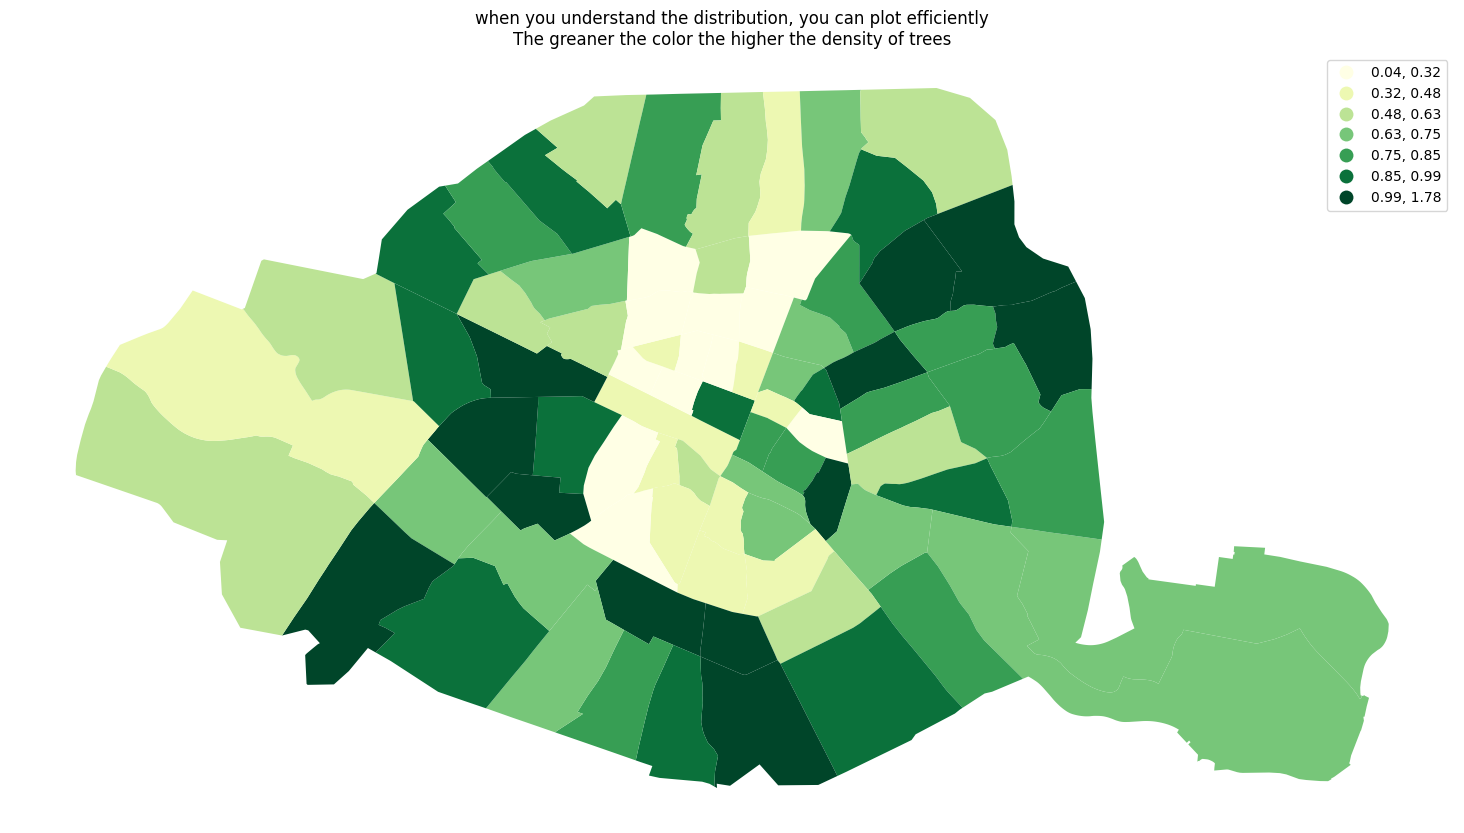

In [38]:
# Generate the choropleth and store the axis
ax = districts_trees.plot(column='n_trees_per_area', scheme='quantiles',
                          k=7, cmap='YlGn', legend=True, figsize = (20,10))

# Remove frames, ticks and tick labels from the axis
ax.set_axis_off()
plt.title("when you understand the distribution, you can plot efficiently\nThe greaner the color the higher the density of trees")
plt.show()

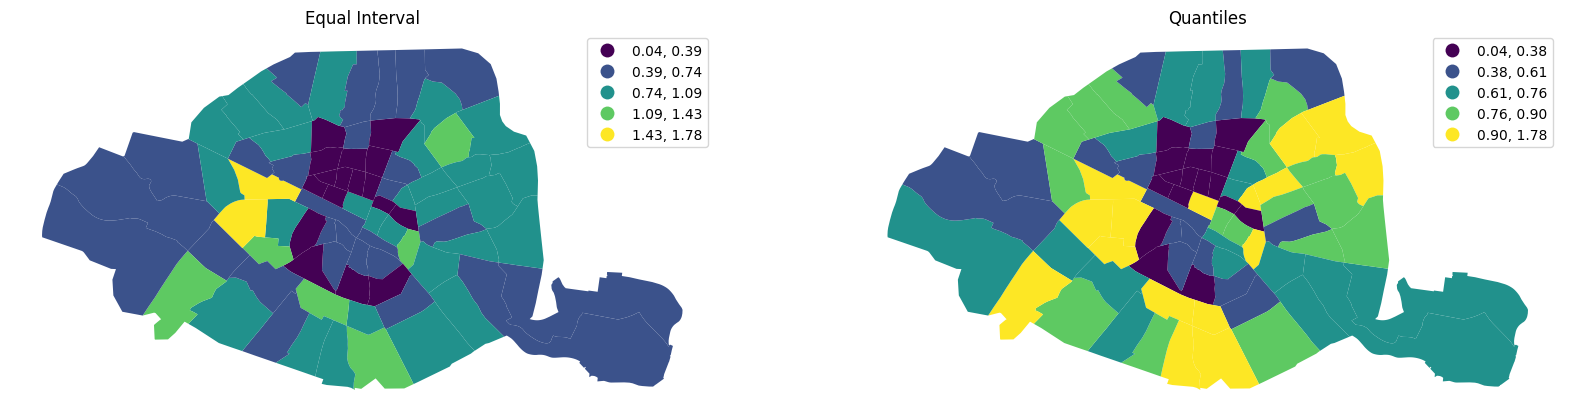

In [41]:
# Set up figure and subplots
fig, axes = plt.subplots(ncols=2, figsize  = (20,10))

# Plot equal interval map
districts_trees.plot(column = 'n_trees_per_area',scheme = 'equal_interval', k=5, legend=True, ax=axes[0])
axes[0].set_title('Equal Interval')
axes[0].set_axis_off()

# Plot quantiles map
districts_trees.plot(column = 'n_trees_per_area',scheme = 'quantiles', k=5, legend=True, ax=axes[1])
axes[1].set_title('Quantiles')
axes[1].set_axis_off()

# Display maps
plt.show()